# Support Vector Machines

In [1]:
%% Machine Learning Online Class
%  Exercise 6 | Support Vector Machines
%
%  Instructions
%  ------------
% 
%  This file contains code that helps you get started on the
%  exercise. You will need to complete the following functions:
%
%     gaussianKernel.m
%     dataset3Params.m
%     processEmail.m
%     emailFeatures.m
%
%  For this exercise, you will not need to change any code in this file,
%  or any other files other than those mentioned above.
%

Loading and Visualizing Data ...


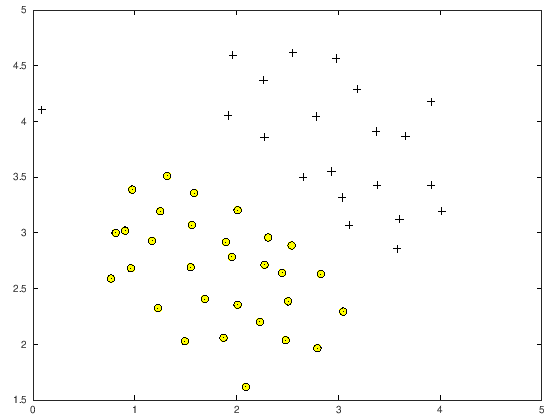

In [2]:
%% =============== Part 1: Loading and Visualizing Data ================
%  We start the exercise by first loading and visualizing the dataset. 
%  The following code will load the dataset into your environment and plot
%  the data.
%

fprintf('Loading and Visualizing Data ...\n')

% Load from ex6data1: 
% You will have X, y in your environment
load('ex6data1.mat');

% Plot training data
plotData(X, y);


Training Linear SVM ...

Training ......................................................................
...............................................................................
...............................................................................
...............................................................................
...............................................................................
...............................................................................
...............................................................................
...............................................................................
...............................................................................
...............................................................................
...............................................................................
...............................................................................
..............

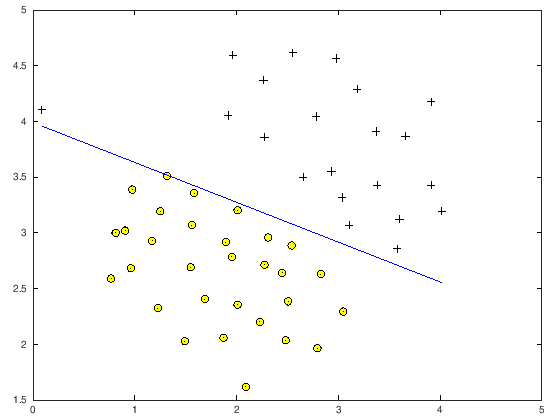

In [3]:
%% ==================== Part 2: Training Linear SVM ====================
%  The following code will train a linear SVM on the dataset and plot the
%  decision boundary learned.
%

% Load from ex6data1: 
% You will have X, y in your environment
load('ex6data1.mat');

fprintf('\nTraining Linear SVM ...\n')

% You should try to change the C value below and see how the decision
% boundary varies (e.g., try C = 1000)
C = 500;
model = svmTrain(X, y, C, @linearKernel, 1e-3, 20);
visualizeBoundaryLinear(X, y, model);

In [4]:
%% =============== Part 3: Implementing Gaussian Kernel ===============
%  You will now implement the Gaussian kernel to use
%  with the SVM. You should complete the code in gaussianKernel.m
%
fprintf('\nEvaluating the Gaussian Kernel ...\n')

x1 = [1 2 1]; x2 = [0 4 -1]; sigma = 2;
sim = gaussianKernel(x1, x2, sigma);

fprintf(['Gaussian Kernel between x1 = [1; 2; 1], x2 = [0; 4; -1], sigma = %f :' ...
         '\n\t%f\n(for sigma = 2, this value should be about 0.324652)\n'], sigma, sim);


Evaluating the Gaussian Kernel ...
Gaussian Kernel between x1 = [1; 2; 1], x2 = [0; 4; -1], sigma = 2.000000 :
	0.324652
(for sigma = 2, this value should be about 0.324652)


Loading and Visualizing Data ...


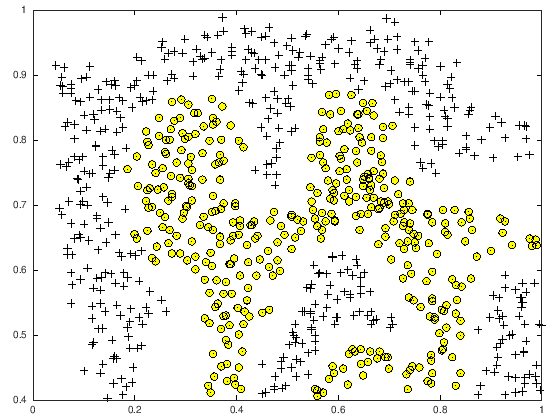

In [5]:
%% =============== Part 4: Visualizing Dataset 2 ================
%  The following code will load the next dataset into your environment and 
%  plot the data. 
%

fprintf('Loading and Visualizing Data ...\n')

% Load from ex6data2: 
% You will have X, y in your environment
load('ex6data2.mat');

% Plot training data
plotData(X, y);


Training SVM with RBF Kernel (this may take 1 to 2 minutes) ...

Training ......................................................................
...............................................................................
...............................................................................
...............................................................................
.............................................. Done! 



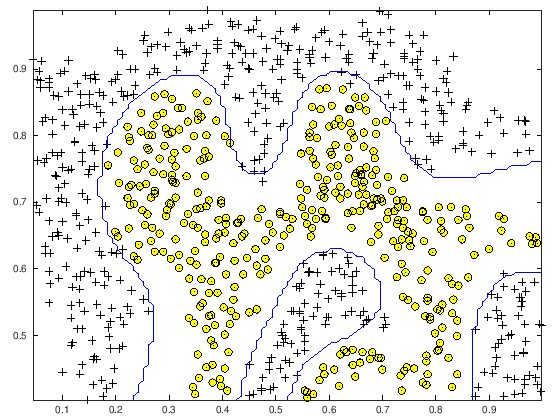

In [6]:
%% ========== Part 5: Training SVM with RBF Kernel (Dataset 2) ==========
%  After you have implemented the kernel, we can now use it to train the 
%  SVM classifier.
% 
fprintf('\nTraining SVM with RBF Kernel (this may take 1 to 2 minutes) ...\n');

% Load from ex6data2: 
% You will have X, y in your environment
load('ex6data2.mat');

% SVM Parameters
C = 1; sigma = 0.1;

% We set the tolerance and max_passes lower here so that the code will run
% faster. However, in practice, you will want to run the training to
% convergence.
model= svmTrain(X, y, C, @(x1, x2) gaussianKernel(x1, x2, sigma)); 
visualizeBoundary(X, y, model);

Loading and Visualizing Data ...


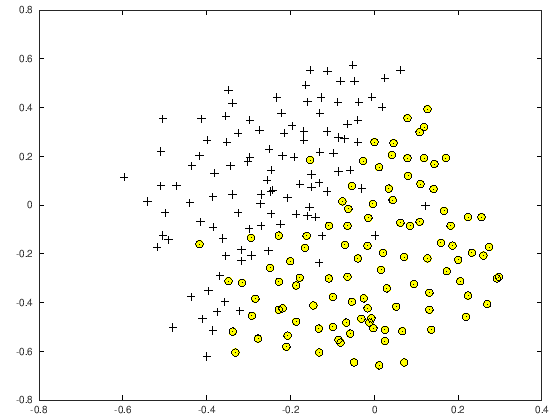

In [7]:
%% =============== Part 6: Visualizing Dataset 3 ================
%  The following code will load the next dataset into your environment and 
%  plot the data. 
%

fprintf('Loading and Visualizing Data ...\n')

% Load from ex6data3: 
% You will have X, y in your environment
load('ex6data3.mat');

% Plot training data
plotData(X, y);


Training ................................. Done! 

Tested C = 0.010000, sigma = 0.010000 -> error = 0.565000

Training ............................................. Done! 

Tested C = 0.030000, sigma = 0.010000 -> error = 0.060000

Training ........................................................ Done! 

Tested C = 0.100000, sigma = 0.010000 -> error = 0.045000

Training .................................................... Done! 

Tested C = 0.300000, sigma = 0.010000 -> error = 0.145000

Training ......................................................... Done! 

Tested C = 1.000000, sigma = 0.010000 -> error = 0.185000

Training ........................................... Done! 

Tested C = 3.000000, sigma = 0.010000 -> error = 0.180000

Training ........................................... Done! 

Tested C = 10.000000, sigma = 0.010000 -> error = 0.180000

Training .......................................................... Done! 

Tested C = 30.000000, sigma = 0.010000 -> error = 0.18

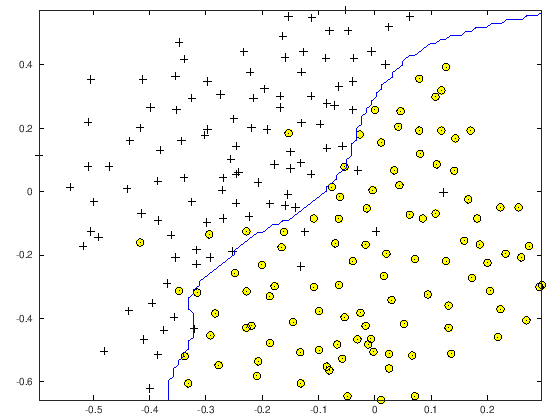

In [8]:
%% ========== Part 7: Training SVM with RBF Kernel (Dataset 3) ==========

%  This is a different dataset that you can use to experiment with. Try
%  different values of C and sigma here.
% 

% Load from ex6data3: 
% You will have X, y in your environment
load('ex6data3.mat');

% Try different SVM Parameters here
[C, sigma] = dataset3Params(X, y, Xval, yval);

% Train the SVM
model= svmTrain(X, y, C, @(x1, x2) gaussianKernel(x1, x2, sigma));
visualizeBoundary(X, y, model);

# Spam Classification with SVMs

In [9]:
%% Machine Learning Online Class
%  Exercise 6 | Spam Classification with SVMs
%
%  Instructions
%  ------------
% 
%  This file contains code that helps you get started on the
%  exercise. You will need to complete the following functions:
%
%     gaussianKernel.m
%     dataset3Params.m
%     processEmail.m
%     emailFeatures.m
%
%  For this exercise, you will not need to change any code in this file,
%  or any other files other than those mentioned above.
%

In [10]:
%% ==================== Part 1: Email Preprocessing ====================
%  To use an SVM to classify emails into Spam v.s. Non-Spam, you first need
%  to convert each email into a vector of features. In this part, you will
%  implement the preprocessing steps for each email. You should
%  complete the code in processEmail.m to produce a word indices vector
%  for a given email.

fprintf('\nPreprocessing sample email (emailSample1.txt)\n');

% Extract Features
file_contents = readFile('emailSample1.txt');
word_indices  = processEmail(file_contents);

% Print Stats
fprintf('Word Indices: \n');
fprintf(' %d', word_indices);
fprintf('\n\n');


Preprocessing sample email (emailSample1.txt)

==== Processed Email ====

anyon know how much it cost to host a web portal well it depend on how mani 
visitor you re expect thi can be anywher from less than number buck a month 
to a coupl of dollarnumb you should checkout httpaddr or perhap amazon ecnumb 
if your run someth big to unsubscrib yourself from thi mail list send an 
email to emailaddr 

Word Indices: 
 86 916 794 1077 883 370 1699 790 1822 1831 883 431 1171 794 1002 1893 1364 592 1676 238 162 89 688 945 1663 1120 1062 1699 375 1162 479 1893 1510 799 1182 1237 810 1895 1440 1547 181 1699 1758 1896 688 1676 992 961 1477 71 530 1699 531


 86 916 794 1077 883 370 1699 790 1822 1831 883 431 1171 794 1002 1893 1364 592 1676 238 162 89 688 945 1663 1120 1062 1699 375 1162 479 1893 1510 799 1182 1237 810 1895 1440 1547 181 1699 1758 1896 688 1676 992 961 1477 71 530 1699 531


In [11]:
%% ==================== Part 2: Feature Extraction ====================
%  Now, you will convert each email into a vector of features in R^n. 
%  You should complete the code in emailFeatures.m to produce a feature
%  vector for a given email.

fprintf('\nExtracting features from sample email (emailSample1.txt)\n');

% Extract Features
file_contents = readFile('emailSample1.txt');
word_indices  = processEmail(file_contents);
features      = emailFeatures(word_indices);

% Print Stats
fprintf('Length of feature vector: %d\n', length(features));
fprintf('Number of non-zero entries: %d\n', sum(features > 0));


Extracting features from sample email (emailSample1.txt)

==== Processed Email ====

anyon know how much it cost to host a web portal well it depend on how mani 
visitor you re expect thi can be anywher from less than number buck a month 
to a coupl of dollarnumb you should checkout httpaddr or perhap amazon ecnumb 
if your run someth big to unsubscrib yourself from thi mail list send an 
email to emailaddr 

Length of feature vector: 1899
Number of non-zero entries: 45


In [12]:
%% =========== Part 3: Train Linear SVM for Spam Classification ========
%  In this section, you will train a linear classifier to determine if an
%  email is Spam or Not-Spam.

% Load the Spam Email dataset
% You will have X, y in your environment
load('spamTrain.mat');

fprintf('\nTraining Linear SVM (Spam Classification)\n')
fprintf('(this may take 1 to 2 minutes) ...\n')

C = 0.1;
model = svmTrain(X, y, C, @linearKernel);

p = svmPredict(model, X);

fprintf('Training Accuracy: %f\n', mean(double(p == y)) * 100);


Training Linear SVM (Spam Classification)
(this may take 1 to 2 minutes) ...

Training ......................................................................
...............................................................................
...............................................................................
 Done! 

Training Accuracy: 99.825000


In [13]:
%% =================== Part 4: Test Spam Classification ================
%  After training the classifier, we can evaluate it on a test set. We have
%  included a test set in spamTest.mat

% Load the test dataset
% You will have Xtest, ytest in your environment
load('spamTest.mat');

fprintf('\nEvaluating the trained Linear SVM on a test set ...\n')

p = svmPredict(model, Xtest);

fprintf('Test Accuracy: %f\n', mean(double(p == ytest)) * 100);


Evaluating the trained Linear SVM on a test set ...
Test Accuracy: 98.600000


In [14]:
%% ================= Part 5: Top Predictors of Spam ====================
%  Since the model we are training is a linear SVM, we can inspect the
%  weights learned by the model to understand better how it is determining
%  whether an email is spam or not. The following code finds the words with
%  the highest weights in the classifier. Informally, the classifier
%  'thinks' that these words are the most likely indicators of spam.
%

% Sort the weights and obtin the vocabulary list
[weight, idx] = sort(model.w, 'descend');
vocabList = getVocabList();

fprintf('\nTop predictors of spam: \n');
for i = 1:15
    fprintf(' %-15s (%f) \n', vocabList{idx(i)}, weight(i));
end


Top predictors of spam: 
 our             (0.498324) 
 click           (0.467877) 
 remov           (0.423398) 
 guarante        (0.385791) 
 visit           (0.366266) 
 basenumb        (0.341266) 
 dollar          (0.328031) 
 will            (0.266893) 
 price           (0.265407) 
 pleas           (0.258948) 
 most            (0.258294) 
 nbsp            (0.258019) 
 lo              (0.256610) 
 hour            (0.239964) 
 ga              (0.239876) 


In [15]:
%% =================== Part 6: Try Your Own Emails =====================
%  Now that you've trained the spam classifier, you can use it on your own
%  emails! In the starter code, we have included spamSample1.txt,
%  spamSample2.txt, emailSample1.txt and emailSample2.txt as examples. 
%  The following code reads in one of these emails and then uses your 
%  learned SVM classifier to determine whether the email is Spam or 
%  Not Spam

% Set the file to be read in (change this to spamSample2.txt,
% emailSample1.txt or emailSample2.txt to see different predictions on
% different emails types). Try your own emails as well!
filename = 'spamSample1.txt';

% Read and predict
file_contents = readFile(filename);
word_indices  = processEmail(file_contents);
x             = emailFeatures(word_indices);
p = svmPredict(model, x);

fprintf('\nProcessed %s\n\nSpam Classification: %d\n', filename, p);
fprintf('(1 indicates spam, 0 indicates not spam)\n\n');


==== Processed Email ====

do you want to make dollarnumb or more per week if you ar a motiv and qualifi 
individu i will person demonstr to you a system that will make you dollarnumb 
number per week or more thi is not mlm call our number hour pre record number 
to get the detail number number number i need peopl who want to make seriou 
monei make the call and get the fact invest number minut in yourself now 
number number number look forward to your call and i will introduc you to 
peopl like yourself who ar current make dollarnumb number plu per week number 
number number numberljgvnumb numberleannumberlrmsnumb 
numberwxhonumberqiytnumb numberrjuvnumberhqcfnumb numbereidbnumberdmtvlnumb 


Processed spamSample1.txt

Spam Classification: 1
(1 indicates spam, 0 indicates not spam)



# Submission

In [16]:
submit

== Submitting solutions | Support Vector Machines...


Use token from last successful submission (callisto@praseodym.net)? (Y/n): y



Training .............................. Done! 

Tested C = 0.010000, sigma = 0.010000 -> error = 0.565000

Training .................................................... Done! 

Tested C = 0.030000, sigma = 0.010000 -> error = 0.060000

Training .............................................. Done! 

Tested C = 0.100000, sigma = 0.010000 -> error = 0.045000

Training ............................................... Done! 

Tested C = 0.300000, sigma = 0.010000 -> error = 0.145000

Training ............................ Done! 

Tested C = 1.000000, sigma = 0.010000 -> error = 0.180000

Training .......................................... Done! 

Tested C = 3.000000, sigma = 0.010000 -> error = 0.180000

Training ........................................... Done! 

Tested C = 10.000000, sigma = 0.010000 -> error = 0.185000

Training ....................................................... Done! 

Tested C = 30.000000, sigma = 0.010000 -> error = 0.180000

Training .............................